In [5]:
import torch
import torchvision
import torchvision.transforms as transforms
torch.cuda.is_available()

True

In [30]:
'''
Loading dataset from the torchvision package
train_set is an instance the fashionMNIST class
int the constructor we specify the directory where the dataset is located, downloaded if not exist and transform that should be performormed on data elements. The composed class allows us to create a composition of transformations in this case we are just turning out data into a tensor which is a single transformation
'''

'\nLoading dataset from the torchvision package\ntrain_set is an instance the fashionMNIST class\nint the constructor we specify the directory where the dataset is located, downloaded if not exist and transform that should be performormed on data elements. The composed class allows us to create a composition of transformations in this case we are just turning out data into a tensor which is a single transformation\n'

In [10]:
train_set= torchvision.datasets.FashionMNIST(
    root= './data/FashionMNIST',
    train= True,
    download= True,
    transform= transforms.Compose([
        transforms.ToTensor()
    ])
)

Processing...
Done!


In [31]:
'''
for the trainloader we are using the dataloader constructor and passing the training set along with the batch size
'''

'\nfor the trainloader we are using the dataloader constructor and passing the training set along with the batch size\n'

In [39]:
train_loader= torch.utils.data.DataLoader(
    train_set,
    batch_size=100
)

In [40]:
import numpy as np
import matplotlib.pyplot as plt

torch.set_printoptions(linewidth= 120)

In [41]:
print(len(train_set))
print(train_set.train_labels.bincount())
print(train_set.train_labels)

60000
tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])
tensor([9, 0, 0,  ..., 3, 0, 5])


In [42]:
sample= next(iter(train_set))
image, label= sample

C:\Users\JFT\Anaconda3\envs\layout_est\lib\site-packages\ipykernel_launcher.py:2: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  
tensor(9)


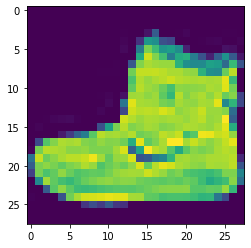

In [44]:
plt.imshow(image[0])
print(label[0])

In [45]:
'''
batch
'''

'\nbatch\n'

In [46]:
batch= next(iter(train_loader))
images, labels= batch
print(images.shape)
print(labels.shape)

torch.Size([100, 1, 28, 28])
torch.Size([100])


labels:  tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4, 3, 1, 4, 8, 4, 3, 0, 2, 4, 4, 5, 3, 6, 6, 0, 8, 5,
        2, 1, 6, 6, 7, 9, 5, 9, 2, 7, 3, 0, 3, 3, 3, 7, 2, 2, 6, 6, 8, 3, 3, 5, 0, 5, 5, 0, 2, 0, 0, 4, 1, 3, 1, 6, 3,
        1, 4, 4, 6, 1, 9, 1, 3, 5, 7, 9, 7, 1, 7, 9, 9, 9, 3, 2, 9, 3, 6, 4, 1, 1, 8])


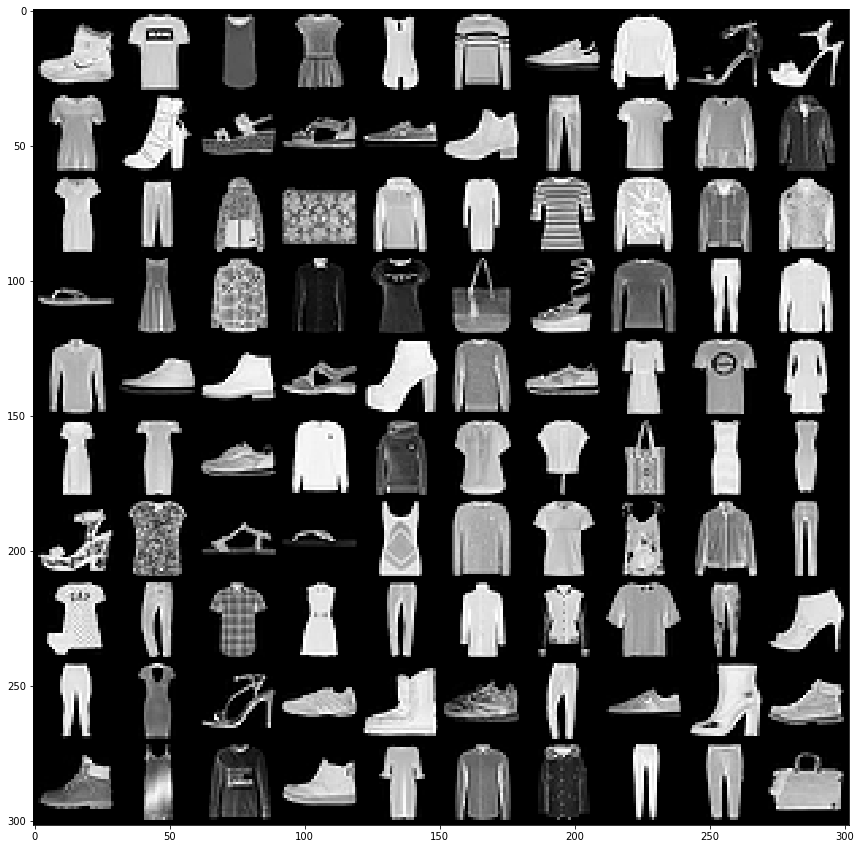

In [48]:
grid= torchvision.utils.make_grid(images, nrow= 10)
plt.figure(figsize=(15, 15))
plt.imshow(np.transpose(grid, (1,2,0)))
print('labels: ', labels)

In [ ]:
'''
Building a neural network
'''

In [65]:
import torch.nn as nn
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.conv1= nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2= nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        self.fc1= nn.Linear(in_features=12*4*4, out_features=120)
        self.fc2= nn.Linear(in_features=120, out_features=60)
        self.out= nn.Linear(in_features=60, out_features=10)

    def forward(self):
        # input layer
        t=t
        # hidden 1st convolutional layer
        t=self.conv1(t)
        t=F.relu(t)
        t=F.max_pool2d(t, kernel_size=2, stride=2)
        
        # hidden 2nd convolutional layer
        t=self.conv2(t)
        t=F.relu(t)
        t=F.max_pool2d(t, kernel_size=2, stride=2)        
        
        # flattening for linear layer
        t=t.reshape(-1, 12*4*4)
        
        # linear layer
        t=self.fc1(t)
        t=F.relu(t)

        t=self.fc2(t)
        t=F.relu(t)

        # output layer
        t=self.out(t)
        #t=F.softmax(t, dim=1)
        
        return t

    # def __repr__(self):
    #     return "Convolutional Neural Network"

In [66]:
network= Network()
network

Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)

class OHLC(Dataset):
    # initialize dataset
    def __init__(self, csv_file):
        #super().__init__(*args, **kwargs)
        self.data= pd.read_csv(csv_file)

    # gets an item from the dataset at a specific index location within the dataset
    def __getitem__(self, index):
        r= self.data.iloc[index]
        label= torch.tensor(r.is_up_day, dtype= torch.long)
        sample= self.normalize(torch.tensor([r.open, r.high, r.low, r.close]))
        return sample, label
    
    # returns length of the dataset
    def __len__(self):
        return len(self.data)
